# The origine of Music dataset

## 1. Introduction

We will be studying the dataset called *Geographical Original of Music* which can be found on the [UCI Machine learning site](https://archive.ics.uci.edu/ml/datasets/Geographical+Original+of+Music)  
This dataset contains audio feature from 1059 songs labelled with their country of origine.  
The purpose of this dataset is to predict the country of origine of songs automaticaly.  
Their are 33 countries represented in this dataset.
The music used is traditional, ethnic or "world" only, as classified by the publishers of the product on which it appears. Any Western music is not included because its influence is global - what we seek are the aspects of music that most influence location

## 2. Retrieving the data

### 2.1. Option 1 : Download data from UCI website

#### 2.1.1. Create a dedicated folder

In [81]:
dir.create("Music_Project", showWarnings = FALSE, recursive = TRUE)
setwd("Music_Project")

#### 2.1.2. Dowload the ziped folder and unzip it

In [257]:
download.file(url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00315/Geographical%20Original%20of%20Music.zip",
              destfile = "OriginOfMusic.zip")

In [83]:
zipF<- "OriginOfMusic.zip"
outDir<-"OriginOfMusic"
unzip(zipF,exdir=outDir)

#### 2.1.3. Load the data

In [258]:
path<-file.path("OriginOfMusic","Geographical Original of Music", "default_features_1059_tracks.txt")

In [246]:
df<-read.csv(path, header = FALSE)

### 2.2. Option 2 : Use the dataset provided in the repository

In [ ]:
path<-file.path("data","default_features_1059_tracks.txt")
df<-read.csv(path, header = FALSE)

## 3. Data description

The dataset is a **1059 x 70** table of **numerics**. 
The first **68** columns are the **features** and the last 2 columns are the longitude and latitude where the music was produce.  
We will convert the output columns into a single column with the corresponding **country** which will be are **target**.


### 3.1. Data preparation

#### 3.1.1. Seperate features from outputs 

In [251]:
X<-df[,1:68]
Y<-df[,c(69,70)]

#### 3.1.2. Transform outputs lattitude and longitude into Country Code

##### 3.1.2.1. Define a function with lattitude and longitude as inputs and Country Code as output

In [89]:
getCountry<-function(lat,lon){
  library(httr)
  address<-paste0("http://api.geonames.org/countryCode?lat=",lat,"&lng=",lon,"&username=nicolasn")
  resp<-httr::GET(url = address, config = list(type = "JSON"))
  country<-content(resp, "text", encoding = "UTF-8")
  country<-sub("\n","",country)
  country<-sub("\r","",country)
  return(country)
}

##### 3.1.2.2. Apply this function to the output 

In [90]:
Ycountry<-mapply(getCountry,Y[,1],Y[,2])

##### 3.1.2.3. Clean up error country

In [91]:
X_clean<-X[Ycountry != "ERR:15:no country code found",]
Y_clean<-Ycountry[Ycountry != "ERR:15:no country code found"]

### 3.2. Data visualization
#### 3.2.1. Country distribution

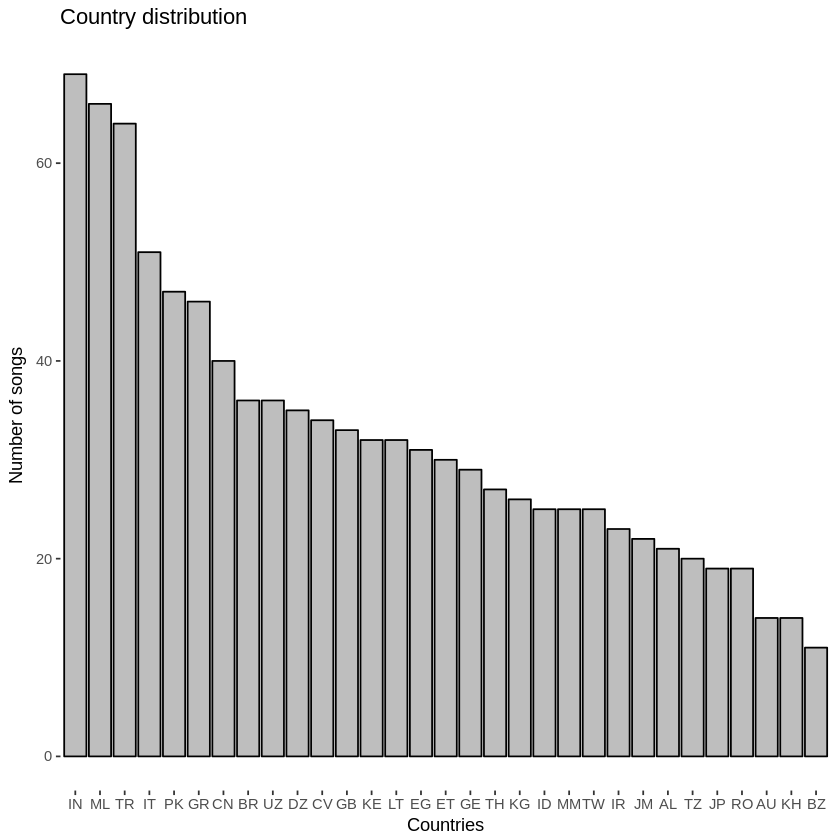

In [256]:
p<-ggplot(data.frame(Y_clean, stringsAsFactors = FALSE), aes( x = reorder(Y_clean, Y_clean, function(x)-length(x))))+
    geom_bar(color = "black" , fill = "grey") +
    labs(title = "Country distribution") +
    labs(x = "Countries") + 
    labs(y = "Number of songs") + 
    theme(panel.background = element_rect(fill = "white", colour = "white"))
p

### 3.2.2. Feature visualization

#### 3.2.2.1. PCA
We try to visualise the feature distribution by reducing the number of feature with a PCA.

In [259]:
ir.pca <- prcomp(X_clean, center = TRUE, scale. = TRUE) 

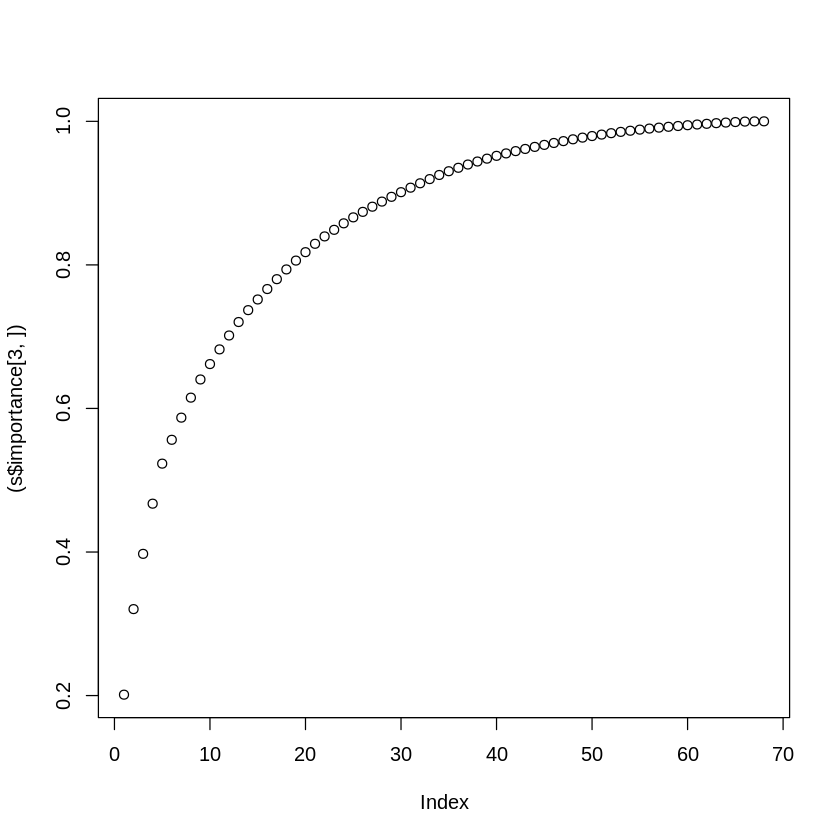

In [297]:
plot((summary(ir.pca)$importance[3,]))

The plot shows that with 2 component we only retain 30% of the variation which is pretty low and thus ploting using only two components doesn't make a lot of sense.
The MARSYAS software output 68 features for some probably good reasons ! 

### Separate dataset into training, testing and validation datasets

In [123]:
random_order<-sample(1:length(Y_clean))

X_clean_random<-X_clean[random_order,]
Y_clean_random<-Y_clean[random_order]

X_train <- X_clean_random[1:600,]
Y_train <- Y_clean_random[1:600]

X_test <- X_clean_random[601:800,]
Y_test <- Y_clean_random[601:800]

X_val <- X_clean_random[801:length(X_clean_random),]
Y_val <- Y_clean_random[801:length(X_clean_random)]